# Random Forest Machine Learning
Random forest is  


In [24]:
# import libraries
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


In [25]:
# import the data
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# label encode the categorical and object data using for loop 
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object'or df[i].dtypes=='category':
        df[i]=le.fit_transform(df[i])
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [27]:
# divide the data into dependent and independent
X=df.drop('sex',axis=1)
y=df['sex']

In [28]:
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# call the model
model=RandomForestClassifier(n_estimators=100,random_state=42)
# fit the model
model.fit(X_train,y_train)
# prediction
y_pred=model.predict(X_test)
# check the accuracy
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy: 0.5918367346938775
confusion matrix:
 [[ 6 13]
 [ 7 23]]
classification report:
               precision    recall  f1-score   support

           0       0.46      0.32      0.37        19
           1       0.64      0.77      0.70        30

    accuracy                           0.59        49
   macro avg       0.55      0.54      0.54        49
weighted avg       0.57      0.59      0.57        49



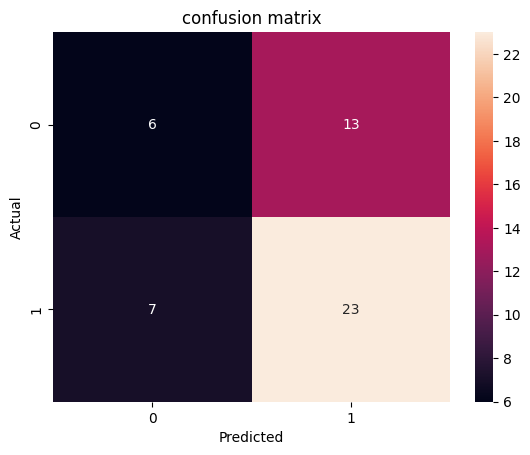

In [29]:
# plot the comnfusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

---

In [31]:
# random forest regressor
# Split the data into train and test
X=df.drop('tip',axis=1)
y=df['tip']

# split the data into train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# call the model
model=RandomForestRegressor(n_estimators=100,random_state=42)

# fit the model
model.fit(X_train,y_train)

# prediction
y_pred=model.predict(X_test)

# check the accuracy
print("mean absolute error:",mean_absolute_error(y_test,y_pred))  
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",numpy.sqrt(mean_squared_error(y_test,y_pred)))  
print("r2 score:",r2_score(y_test,y_pred))


mean absolute error: 0.7750510204081635
mean squared error: 0.9625607446938791
root mean squared error: 0.9811018013916186
r2 score: 0.2299337514142753
